In [1]:
import os
os.getcwd()

'C:\\Users\\Hiba'

In [2]:
os.chdir('C:/Users/Hiba/Desktop/DATASET/imagescode/Dataset')

In [3]:
os.getcwd()

'C:\\Users\\Hiba\\Desktop\\DATASET\\imagescode\\Dataset'

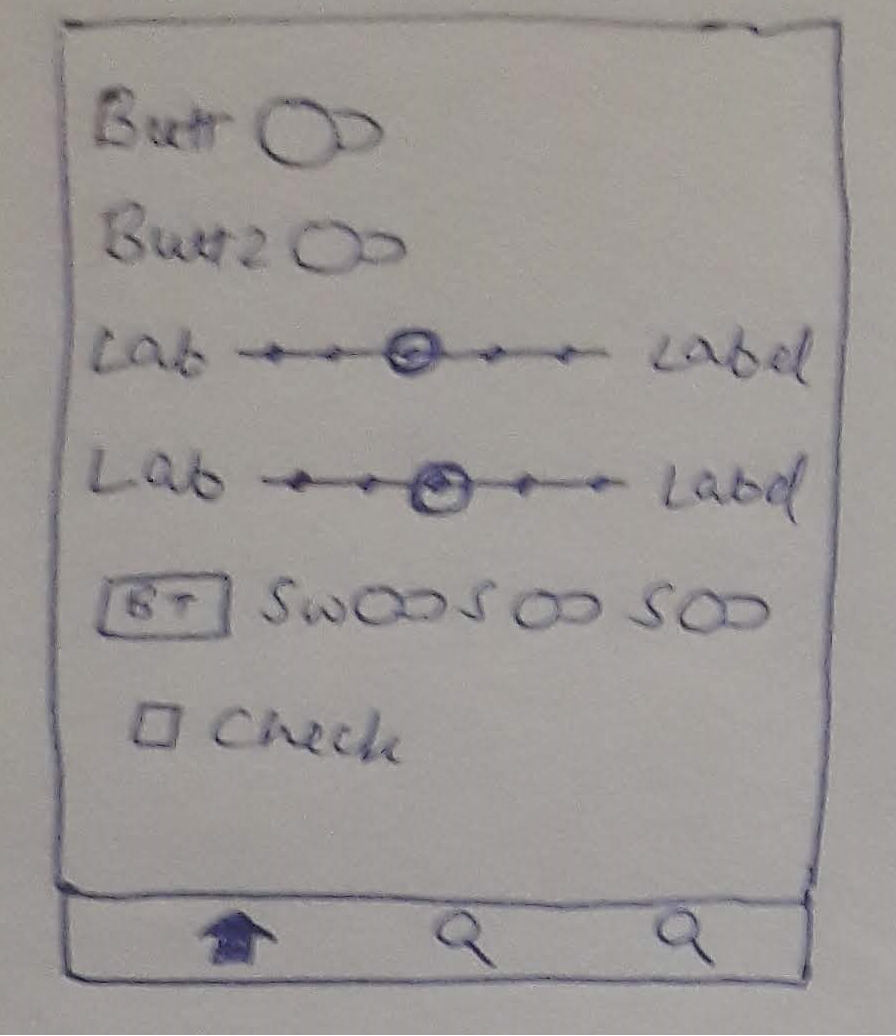

In [4]:
import numpy as np
import pandas as pd
from os import listdir
from numpy import array
from sklearn import preprocessing 
from IPython.display import Image
Image(filename='C:/Users/Hiba/Desktop/DATASET/imagescode/Dataset/1.png',width=200,height=200)

In [5]:
import tensorflow as tf

C:\Users\Hiba\Anaconda3\New folder\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
data_dir='C:/Users/Hiba/Desktop/DATASET/imagescode/Dataset'

In [7]:
import matplotlib.pyplot as plt

def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [8]:
# Read a file and return a string
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

def load_data(data_dir):
    text = []
    images = []
    all_filenames = os.listdir(data_dir)
    for filename in (all_filenames):
        if filename[-3:] == "png":
                 
            image = cv2.imread(data_dir+filename)
            image = cv2.resize(image, (256,256))
            image= np.array(image, dtype=float)
            image = image/image.max()
            
            images.append(image)
        else:
            syntax = '<START> ' + load_doc(data_dir+filename) + ' <END>'
            # Seperate all words with a single space
            syntax = syntax.split()
            syntax = ' '.join(syntax)
            # Add a space before each comma
            syntax = syntax.replace(',', ' ,')
            text.append(syntax)
    images = np.array(images, dtype=float)
    return images, text



In [22]:
from tensorflow.contrib.tensorboard.plugins import projector
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers.convolutional import Conv2D
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import RepeatVector, Input, Embedding, LSTM, concatenate
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.models import model_from_json
from nltk.translate.bleu_score import sentence_bleu
import pickle


In [23]:
train_features = load_data(data_dir)
texts = load_data(data_dir)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Hiba/Desktop/DATASET/imagescode/Dataset1.gui'

In [19]:
#Creating vocabulary for text

setText = [x.split() for x in texts]
setText2 = list(set(x for l in setText for x in l))
with open("unique", "wb") as fp:   #Pickling
    pickle.dump(setText2, fp)
#A dictionary mapping text or symbol to integer
tokenizer = Tokenizer(filters='', split=" ", lower=False)
#Fitting on vocabulary 
tokenizer.fit_on_texts(setText2)
#One spot for the empty word in the vocabulary 
vocab_size = len(tokenizer.word_index) + 1
# Mapping the input sentences into the vocabulary indexes
train_sequences = tokenizer.texts_to_wordsequences(texts)
# The longest set of design tokens
max_sequence = max(len(s) for s in train_sequences)
# No. of tokens to have in each input sentence
max_length = 48


NameError: name 'texts' is not defined

In [20]:
def preprocess_data(sequences, features):
    X, y, image_data = list(), list(), list()
    for img_no, seq in enumerate(sequences):
        for i in range(1, len(seq)):
            in_seq, out_seq = seq[:i], seq[i]
            # Padding the input token sentences to max_sequence with 0
            in_seq = pad_sequences([in_seq], maxlen=max_sequence)[0]
            # Turning the output into one-hot encoding
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # Add the corresponding image to the boostrap token file
            image_data.append(features[img_no])
            # Limit the input sentence to 48 tokens and add it
            X.append(in_seq[-48:])
            y.append(out_seq)
    return np.array(X), np.array(y), np.array(image_data)


In [21]:
X, y, image_data = preprocess_data(train_sequences, train_features)

NameError: name 'train_sequences' is not defined

In [14]:
max_length=48
image_model = Sequential()
image_model.add(Conv2D(16, (3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3,)))
image_model.add(Conv2D(16, (3,3), activation='relu', padding='same', strides=2))
image_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
image_model.add(Conv2D(32, (3,3), activation='relu', padding='same', strides=2))
image_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
image_model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
image_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))

image_model.add(Flatten())
image_model.add(Dense(1024, activation='relu'))
image_model.add(Dropout(0.3))
image_model.add(Dense(1024, activation='relu'))
image_model.add(Dropout(0.3))

image_model.add(RepeatVector(max_length))


In [15]:
tokenizer = Tokenizer(filters='', split=" ", lower=False)
vocab_size = len(tokenizer.word_index) + 1
visual_input = Input(shape=(256, 256, 3,))

encoded_image = image_model(visual_input)

language_input = Input(shape=(max_length,))
language_model = Embedding(vocab_size, 50, input_length=max_length, mask_zero=True)(language_input)
language_model = LSTM(128, return_sequences=True)(language_model)
language_model = LSTM(128, return_sequences=True)(language_model)

decoder = concatenate([encoded_image, language_model])
decoder = LSTM(512, return_sequences=True)(decoder)
decoder = LSTM(512, return_sequences=False)(decoder)
decoder = Dense(vocab_size, activation='softmax')(decoder)

model = Model(inputs=[visual_input, language_input], outputs=decoder)
optimizer = RMSprop(lr=0.0001, clipvalue=1.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
model.fit([image_data, X], y, batch_size=1, shuffle=False, validation_split=0.1, verbose=1, epochs=50)

NameError: name 'image_data' is not defined